In [1]:
import os
import numpy as np

In [2]:
os.getcwd()

'/home/djamel/Documents/Master-2/SEMESTRE_1/Fouille_Donnees/Projet'

In [3]:
base_dir='.'

In [4]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [5]:
train_eosinophil_dir=os.path.join(train_dir,'eosinophil')
os.mkdir(train_eosinophil_dir)
train_lymphocyte_dir=os.path.join(train_dir,'lymphocyte')
os.mkdir(train_lymphocyte_dir)
train_monocyte_dir=os.path.join(train_dir,'monocyte')
os.mkdir(train_monocyte_dir)
train_neutrophil_dir=os.path.join(train_dir,'neutrophil')
os.mkdir(train_neutrophil_dir)

In [6]:
validation_eosinophil_dir=os.path.join(validation_dir,'eosinophil')
os.mkdir(validation_eosinophil_dir)
validation_lymphocyte_dir=os.path.join(validation_dir,'lymphocyte')
os.mkdir(validation_lymphocyte_dir)
validation_monocyte_dir=os.path.join(validation_dir,'monocyte')
os.mkdir(validation_monocyte_dir)
validation_neutrophil_dir=os.path.join(validation_dir,'neutrophil')
os.mkdir(validation_neutrophil_dir)

In [7]:
test_eosinophil_dir=os.path.join(test_dir,'eosinophil')
os.mkdir(test_eosinophil_dir)
test_lymphocyte_dir=os.path.join(test_dir,'lymphocyte')
os.mkdir(test_lymphocyte_dir)
test_monocyte_dir=os.path.join(test_dir,'monocyte')
os.mkdir(test_monocyte_dir)
test_neutrophil_dir=os.path.join(test_dir,'neutrophil')
os.mkdir(test_neutrophil_dir)

In [8]:
import shutil

In [9]:
i=0
source_eosinophil_dir='./TRAIN/EOSINOPHIL'
for fname in os.listdir(source_eosinophil_dir):
    if i<1700:
        src=os.path.join(source_eosinophil_dir,fname)
        dst=os.path.join(train_eosinophil_dir,fname)
        shutil.copy(src,dst)
    else:
        src=os.path.join(source_eosinophil_dir,fname)
        dst=os.path.join(validation_eosinophil_dir,fname)
        shutil.copy(src,dst)   
    i+=1

In [10]:
i=0
source_lymphocyte_dir='./TRAIN/LYMPHOCYTE'
for fname in os.listdir(source_lymphocyte_dir):
    if i<1700:
        src=os.path.join(source_lymphocyte_dir,fname)
        dst=os.path.join(train_lymphocyte_dir,fname)
        shutil.copy(src,dst)
    else:
        src=os.path.join(source_lymphocyte_dir,fname)
        dst=os.path.join(validation_lymphocyte_dir,fname)
        shutil.copy(src,dst)   
    i+=1

In [11]:
i=0
source_monocyte_dir='./TRAIN/MONOCYTE'
for fname in os.listdir(source_monocyte_dir):
    if i<1700:
        src=os.path.join(source_monocyte_dir,fname)
        dst=os.path.join(train_monocyte_dir,fname)
        shutil.copy(src,dst)
    else:
        src=os.path.join(source_monocyte_dir,fname)
        dst=os.path.join(validation_monocyte_dir,fname)
        shutil.copy(src,dst)   
    i+=1

In [12]:
i=0
source_neutrophil_dir='./TRAIN/NEUTROPHIL'
for fname in os.listdir(source_neutrophil_dir):
    if i<1700:
        src=os.path.join(source_neutrophil_dir,fname)
        dst=os.path.join(train_neutrophil_dir,fname)
        shutil.copy(src,dst)
    else:
        src=os.path.join(source_neutrophil_dir,fname)
        dst=os.path.join(validation_neutrophil_dir,fname)
        shutil.copy(src,dst)   
    i+=1

In [13]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(120, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 118, 158, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 38, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 18, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 16, 128)       147584    
__________

In [56]:
from keras import optimizers

In [57]:
# model.compile(loss='binary_crossentropy',
#     optimizer=optimizers.RMSprop(lr=1e-4),
#     metrics=['acc'])

In [58]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',  #adam
    metrics=['accuracy'])

In [59]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(120, 160),
    batch_size=20,
    class_mode='categorical')
    #classes=['eosinophil','lymphocyte','monocyte','neutrophil'])

Found 6800 images belonging to 4 classes.


In [61]:
train_generator.class_indices

{'eosinophil': 0, 'lymphocyte': 1, 'monocyte': 2, 'neutrophil': 3}

In [62]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(120, 160),
    batch_size=20,
    class_mode='categorical')
    #classes=['eosinophil','lymphocyte','monocyte','neutrophil'])

Found 3157 images belonging to 4 classes.


In [63]:
validation_generator.class_indices

{'eosinophil': 0, 'lymphocyte': 1, 'monocyte': 2, 'neutrophil': 3}

In [64]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,  #ligne commentée??
    epochs=20,
    validation_data=validation_generator,
    validation_steps=30)  #ligne commentée??

Epoch 1/20
10/10 [==============================] - 8s 793ms/step - loss: 1.4038 - acc: 0.2550 - val_loss: 1.3852 - val_acc: 0.2667
Epoch 2/20
10/10 [==============================] - 7s 741ms/step - loss: 1.3908 - acc: 0.2300 - val_loss: 1.3858 - val_acc: 0.2583
Epoch 3/20
10/10 [==============================] - 7s 735ms/step - loss: 1.3866 - acc: 0.2550 - val_loss: 1.3862 - val_acc: 0.2650
Epoch 4/20
10/10 [==============================] - 7s 736ms/step - loss: 1.3876 - acc: 0.2550 - val_loss: 1.3889 - val_acc: 0.2350
Epoch 5/20
10/10 [==============================] - 7s 735ms/step - loss: 1.3890 - acc: 0.2550 - val_loss: 1.3871 - val_acc: 0.2583
Epoch 6/20
10/10 [==============================] - 7s 738ms/step - loss: 1.3885 - acc: 0.2400 - val_loss: 1.3856 - val_acc: 0.2613
Epoch 7/20
10/10 [==============================] - 7s 736ms/step - loss: 1.3866 - acc: 0.2550 - val_loss: 1.3864 - val_acc: 0.2467
Epoch 8/20
10/10 [==============================] - 7s 735ms/step - loss: 1.

In [32]:
train_dir

'./train'

In [33]:
train_eosinophil_dir

'./train/eosinophil'

In [34]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 120, 160, 3)
labels batch shape: (20, 4)


In [35]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(120, 160, 3)) 

In [36]:
conv_base.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 40, 128)       0         
__________

In [37]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 1
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 5, 512))
    labels = np.zeros(shape=(sample_count,4))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(120, 160),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [38]:
train_features, train_labels = extract_features(train_dir, 6800)

Found 6800 images belonging to 4 classes.


In [39]:
validation_features, validation_labels = extract_features(validation_dir, 3100)

Found 3157 images belonging to 4 classes.


In [41]:
train_features = np.reshape(train_features, (6800, 3 * 5 * 512))
validation_features = np.reshape(validation_features, (3100, 3 * 5 * 512))

In [65]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=3 * 5 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [66]:
# model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
#    loss='binary_crossentropy',
#    metrics=['acc'])

In [67]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',  #adam
    metrics=['accuracy'])

In [69]:
history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    #steps_per_epoch=170,                
    validation_data=(validation_features, validation_labels))
    #validation_steps=30)

Train on 6800 samples, validate on 3100 samples
Epoch 1/30
6800/6800 [==============================] - 8s 1ms/step - loss: 1.0053 - acc: 0.5646 - val_loss: 0.8291 - val_acc: 0.6784
Epoch 2/30
6800/6800 [==============================] - 8s 1ms/step - loss: 0.8944 - acc: 0.6069 - val_loss: 0.8069 - val_acc: 0.6739
Epoch 3/30
6800/6800 [==============================] - 8s 1ms/step - loss: 0.8268 - acc: 0.6422 - val_loss: 0.7878 - val_acc: 0.7219
Epoch 4/30
6800/6800 [==============================] - 8s 1ms/step - loss: 0.8320 - acc: 0.6372 - val_loss: 0.7546 - val_acc: 0.7342
Epoch 5/30
6800/6800 [==============================] - 8s 1ms/step - loss: 0.7942 - acc: 0.6462 - val_loss: 0.6984 - val_acc: 0.7503
Epoch 6/30
6800/6800 [==============================] - 8s 1ms/step - loss: 0.7383 - acc: 0.6682 - val_loss: 0.6775 - val_acc: 0.7529
Epoch 7/30
6800/6800 [==============================] - 8s 1ms/step - loss: 0.6969 - acc: 0.7001 - val_loss: 0.5472 - val_acc: 0.7945
Epoch 8/30
680

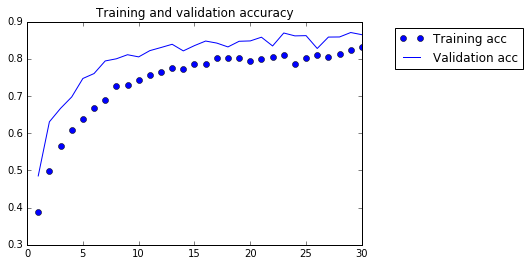

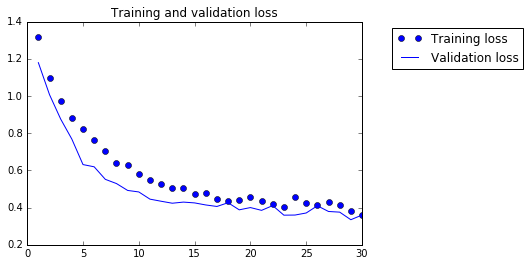

In [57]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.show()